In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
import tensorflow

In [18]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [19]:
df.shape

(10000, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [23]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [27]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [29]:
X = df.drop(columns=['Exited'])

In [31]:
y = df['Exited']

In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [36]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [37]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [67]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim = 11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\IT BD\anaconda3\envs\tfCPU\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [87]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8766 - loss: 0.2982 - val_accuracy: 0.8569 - val_loss: 0.3317
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3062 - val_accuracy: 0.8587 - val_loss: 0.3312
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8689 - loss: 0.3141 - val_accuracy: 0.8575 - val_loss: 0.3336
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8811 - loss: 0.3052 - val_accuracy: 0.8606 - val_loss: 0.3322
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8779 - loss: 0.3007 - val_accuracy: 0.8631 - val_loss: 0.3307
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8726 - loss: 0.3106 - val_accuracy: 0.8581 - val_loss: 0.3318
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8667 - loss: 0.3093 - val_accuracy: 0.8594 - val_loss: 0.3320
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8721 - loss: 0.3061 - val_accu

In [81]:
model.layers[0].get_weights()

[array([[ 1.02589384e-01,  6.76307976e-02, -1.25085056e-01,
          1.12418886e-02,  2.51996368e-01,  9.34267975e-03,
          3.97506207e-01, -2.54817866e-03, -3.45166534e-01,
         -1.95832342e-01,  5.59750795e-01],
        [-1.04329601e-01, -5.59413612e-01, -2.55629450e-01,
         -9.00063515e-01,  5.99660613e-02, -1.32153645e-01,
         -6.36510611e-01,  8.51241291e-01,  3.92002314e-01,
          6.02794468e-01, -3.73438627e-01],
        [ 1.61736198e-02, -9.80961174e-02, -2.18570963e-01,
          1.03832809e-02,  3.88548970e-01, -1.04612038e-01,
          2.84384489e-01, -1.70360561e-02,  7.22896993e-01,
         -7.82453865e-02, -8.23192537e-01],
        [ 5.83255529e-01,  1.08927536e+00,  8.09545100e-01,
          9.39540192e-03, -1.08494252e-01,  1.06680000e+00,
         -9.32910323e-01,  3.60615551e-01, -1.84046209e-01,
         -3.00143119e-02, -6.07652307e-01],
        [ 1.37545216e+00, -1.76361233e-01, -2.89603949e-01,
          1.32894382e-01,  1.48286152e+00, -

In [83]:
model.layers[1].get_weights()

[array([[ 8.01470280e-02, -8.27003479e-01,  5.84030092e-01,
         -7.81705901e-02, -8.42074573e-01, -6.43283665e-01,
          1.03737511e-01,  7.29136348e-01,  5.46905637e-01,
         -8.17546964e-01, -7.30108976e-01],
        [ 8.19967151e-01,  3.33053738e-01,  3.39682668e-01,
          6.55572951e-01,  1.24987386e-01, -2.71657974e-01,
          5.32642305e-01,  8.67299503e-04, -9.74967241e-01,
         -1.44991964e-01, -5.08557796e-01],
        [ 3.55128288e-01,  8.97041112e-02, -5.84463954e-01,
          5.61912894e-01,  1.28259301e-01, -3.75505716e-01,
         -3.24284554e-01, -5.01896083e-01,  1.09728172e-01,
          4.02613908e-01,  4.60288078e-01],
        [ 4.51833606e-01,  1.85493410e-01, -1.68727279e-01,
          9.20364678e-01, -1.10383607e-01,  7.96760142e-01,
          8.56471717e-01, -2.20684763e-02, -3.55579525e-01,
          3.73773351e-02, -7.23277032e-01],
        [-2.28333339e-01,  3.68189991e-01,  3.51600558e-01,
         -2.50429571e-01,  6.24029636e-01,  

In [84]:
y_log = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [85]:
y_pred = np.where(y_log>.5, 1, 0)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4785

In [88]:
import matplotlib.pyplot as plt

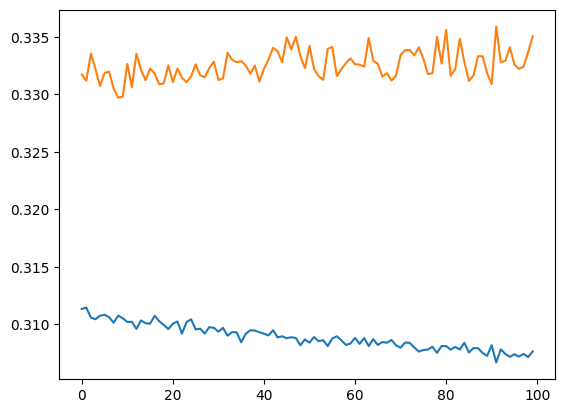

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

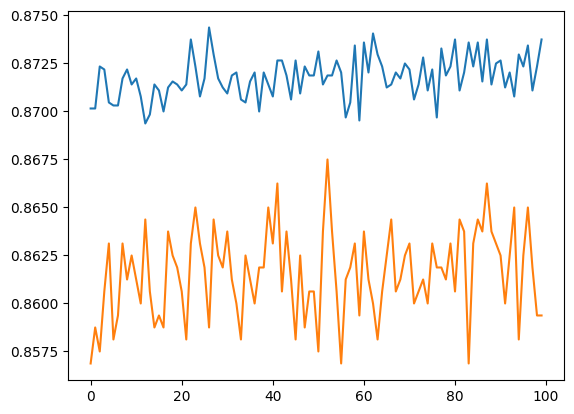

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])